In [8]:
%load_ext Cython
%load_ext autoreload
%autoreload 2
from vtk import *
import numpy as np
from numpy.linalg import inv, det


class Point():
    def __init__(self, x, y, z, index):
        self.x = x
        self.y = y
        self.z = z
        self.index = index

class Cell():
    def __init__(self, number_of_connections, points, cell_type):
        self.number_of_connections = number_of_connections
        self.points = points
        self.cell_type = cell_type
        

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from IO import import_vtk_file
from grid import Grid
# The source file
file_name = "Square_Triangle2"
 
data = import_vtk_file(file_name)

grid = Grid(data)
grid.set_grid()


[[  1.   0.   0. ...,   0.   0.   0.]
 [  0.   1.   0. ...,   0.   0.   0.]
 [  0.   0.   1. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  44.   0. -11.]
 [  0.   0.   0. ...,   0.  44. -11.]
 [  0.   0.   0. ..., -11. -11.  44.]]


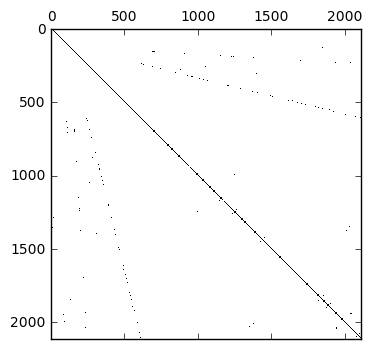

[[  1.00000000e+00   3.42753803e-18   5.33245745e-21 ...,  -1.61629287e-18
   -8.97084909e-20  -1.83107001e-18]
 [  8.63060736e-17   1.00000000e+00   1.00117374e-18 ...,  -3.98182488e-18
    1.76320688e-17   1.11054332e-17]
 [ -1.51724777e-19  -1.40088373e-17   1.00000000e+00 ...,  -4.24790103e-17
    3.72759179e-17   1.37634412e-17]
 ..., 
 [  2.26231455e-04   2.43228992e-04   3.14082702e-04 ...,   6.95019225e-02
    4.05891245e-02   4.68235610e-02]
 [  2.43228992e-04   2.26231455e-04   2.86271765e-04 ...,   4.05891245e-02
    6.95019225e-02   4.68235610e-02]
 [  2.45610001e-04   2.45610001e-04   2.89315767e-04 ...,   4.68235610e-02
    4.68235610e-02   6.95752578e-02]]


In [63]:
grid.points
grid.cells
def l(x, y):
    return 10

def m(x, y):
    return 11
A, f = grid.construct_system(l, m, 4)
print(A)
plt.spy(A)
plt.show()
print(inv(A))

In [64]:
from scipy.sparse.linalg import spsolve
print(A)

row = []
col = []
data = []

for i in range(len(A)):
    for j in range(len(A)):
        if(A[i, j] != 0):
            row.append(i)
            col.append(j)
            data.append(A[i, j])

[[  1.   0.   0. ...,   0.   0.   0.]
 [  0.   1.   0. ...,   0.   0.   0.]
 [  0.   0.   1. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  44.   0. -11.]
 [  0.   0.   0. ...,   0.  44. -11.]
 [  0.   0.   0. ..., -11. -11.  44.]]


In [65]:
from scipy.sparse import coo_matrix

B = coo_matrix((data, (row, col)), shape=(A.shape[0], A.shape[0]))

sol = np.matrix(spsolve(B.tocsr(), f)).T

xlist = []
ylist = []

for point in grid.points:
    x = point[0, 0]
    y = point[0, 1]
    xlist.append(x)
    ylist.append(y)
print(sol[0:10])

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [56]:
x_list = []
y_list = []

for cell in grid.cells:
    for i in range(3):
        x = grid.points[cell.item(i)][0, 0]
        y = grid.points[cell.item(i)][0, 1]
        x_list.append(x)
        y_list.append(y)

for cell in grid.boundary_cells:
    for i in range(3):
        x = grid.points[cell[i]][0, 0]
        y = grid.points[cell[i]][0, 1]
        x_list.append(x)
        y_list.append(y)

plt.plot(x_list, y_list)
plt.show()
        


IndexError: list index out of range

TypeError: Shape of x does not match that of z: found (2113, 2113) instead of (1505, 2113).

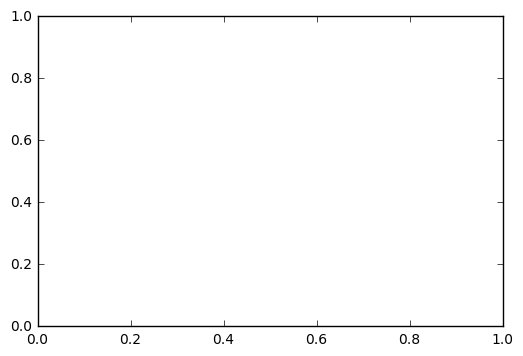

In [53]:

import numpy as np
import matplotlib.pyplot as plt
X, Y = np.meshgrid(xlist, ylist)

Z = [np.array(spsolve(B.tocsr(), f))]*1505
plt.figure()
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()



In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
  return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(xlist, ylist)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])

In [ ]:
plt.scatter(xlist,ylist)

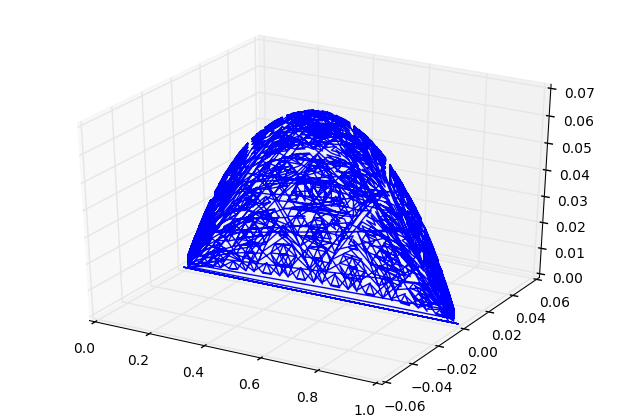

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)

x = xlist
y = ylist
z = sol.T

# put 0s on the y-axis, and put the y axis on the z-axis
ax.plot(xs=x, ys=[0]*len(x), zs=z, zdir='z', label='ys=0, zdir=z')
plt.show()

In [67]:
print(grid.number_of_points)
for i in range(len(xlist)):
    print(xlist[i], ylist[i], sol[i])
    

2113
(0.0, 0.0, matrix([[ 0.]]))
(1.0, 0.0, matrix([[ 0.]]))
(1.0, 1.0, matrix([[ 0.]]))
(0.0, 1.0, matrix([[ 0.]]))
(0.0, 0.96875000000001599, matrix([[ 0.]]))
(0.0, 0.93750000000003197, matrix([[ 0.]]))
(0.0, 0.90625000000003963, matrix([[ 0.]]))
(0.0, 0.87500000000002542, matrix([[ 0.]]))
(0.0, 0.84375000000012867, matrix([[ 0.]]))
(0.0, 0.81250000000025768, matrix([[ 0.]]))
(0.0, 0.78125000000033806, matrix([[ 0.]]))
(0.0, 0.75000000000041278, matrix([[ 0.]]))
(0.0, 0.71875000000053602, matrix([[ 0.]]))
(0.0, 0.6875000000007041, matrix([[ 0.]]))
(0.0, 0.65625000000083733, matrix([[ 0.]]))
(0.0, 0.62500000000095091, matrix([[ 0.]]))
(0.0, 0.59375000000100708, matrix([[ 0.]]))
(0.0, 0.56250000000109746, matrix([[ 0.]]))
(0.0, 0.5312500000011624, matrix([[ 0.]]))
(0.0, 0.50000000000133049, matrix([[ 0.]]))
(0.0, 0.46875000000124728, matrix([[ 0.]]))
(0.0, 0.43750000000116418, matrix([[ 0.]]))
(0.0, 0.40625000000108102, matrix([[ 0.]]))
(0.0, 0.37500000000099792, matrix([[ 0.]]))
(0.0,

NameError: name 'UnitSquare' is not defined

In [31]:
list = [(0.45229191244852124, 0.5084674785485485),
(0.46533424783576427, 0.5196713481985027),
(0.2650239065955976, 0.30794855934150045)]

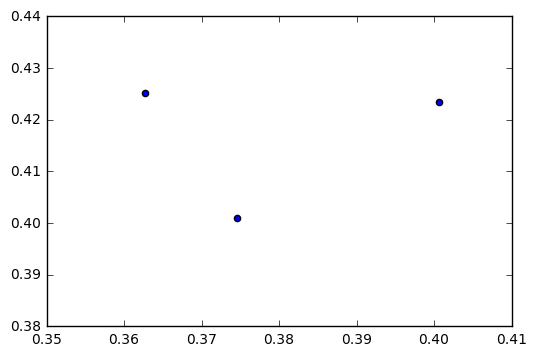

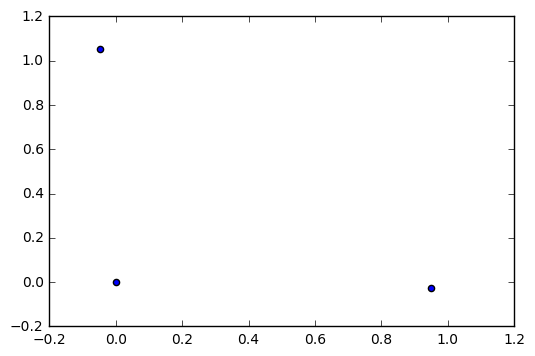

[0, 0.94902919, -0.03718607, 0.16666666666666666, 0.16666666666666666, 0.6666666666666666]


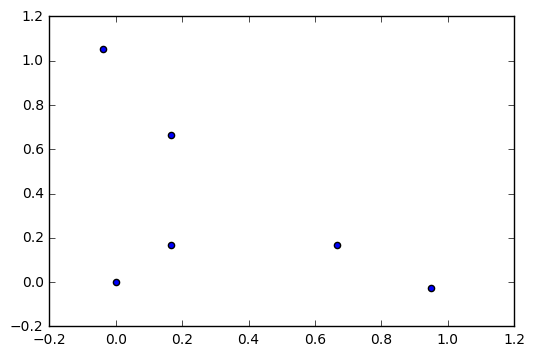

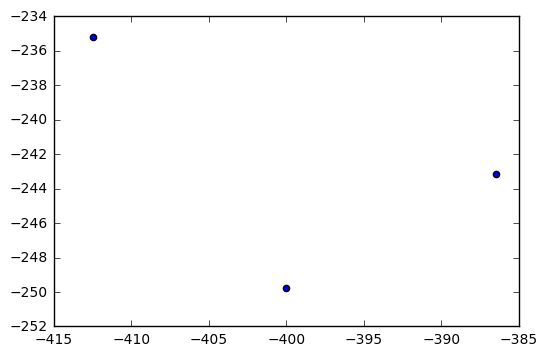

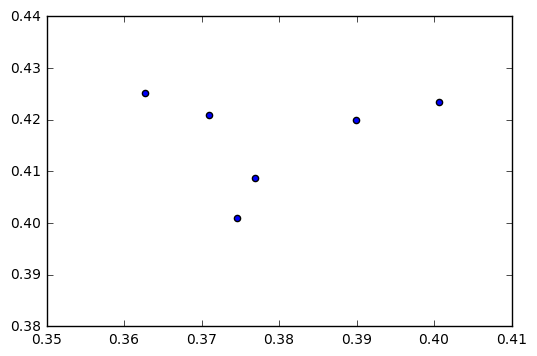

In [74]:
x_list = []
y_list = []
for i in range(len(list)):
    x, y = list[i]
    x_list.append(x)
    y_list.append(y)
    
x_list = [0.3745360117058472, 0.3626650575269999, 0.4006206824803333]
y_list = [0.401037838414096, 0.4252333329140784, 0.4234455777140045]
plt.scatter(x_list, y_list)
plt.show()


x_list = [0, 0.94904929, -0.04718607]
y_list = [0, -0.0249978, 1.05492893]
plt.scatter(x_list, y_list)
plt.show()

x_list = [0, 0.94902919, -0.03718607, 1./6, 1./6, 2./3]
y_list = [0, -0.0249978, 1.05492893, 1./6, 2./3, 1./6]
print(x_list)
plt.scatter(x_list, y_list)
plt.show()

x_list = [-399.98843042, -386.50352845, -412.47696079]
y_list = [-249.74405153, -243.12799938, -235.20625284]
plt.scatter(x_list, y_list)
plt.show()
x_list = [0.3745360117058472, 0.3626650575269999, 0.4006206824803333, 0.37690496, 0.3899473, 0.37096949]
y_list = [0.401037838414096, 0.4252333329140784, 0.4234455777140045, 0.40880504, 0.42000891, 0.42090279]

plt.scatter(x_list, y_list)
plt.show()


In [93]:
print(inv(A))

[[ -2.39553172e+13  -2.39553172e+13  -2.39553172e+13 ...,  -2.39553172e+13
   -2.39553172e+13  -2.39553172e+13]
 [ -2.39553172e+13  -2.39553172e+13  -2.39553172e+13 ...,  -2.39553172e+13
   -2.39553172e+13  -2.39553172e+13]
 [ -2.39553172e+13  -2.39553172e+13  -2.39553172e+13 ...,  -2.39553172e+13
   -2.39553172e+13  -2.39553172e+13]
 ..., 
 [ -2.39553172e+13  -2.39553172e+13  -2.39553172e+13 ...,  -2.39553172e+13
   -2.39553172e+13  -2.39553172e+13]
 [ -2.39553172e+13  -2.39553172e+13  -2.39553172e+13 ...,  -2.39553172e+13
   -2.39553172e+13  -2.39553172e+13]
 [ -2.39553172e+13  -2.39553172e+13  -2.39553172e+13 ...,  -2.39553172e+13
   -2.39553172e+13  -2.39553172e+13]]


In [141]:
from numpy.linalg import det
det(A)

1.4439688603729057e+161

In [144]:
1/3

0

In [145]:
type(1)

int

In [148]:
if type(1) is int:
    print('int')

int


In [9]:
inv(A)

array([[  8.19545547e-01,   1.86144223e-41,   2.36069542e-41, ...,
          1.63144838e-46,   1.31724844e-45,   4.36643711e-45],
       [  1.86144223e-41,   8.14058380e-01,   3.58407140e-72, ...,
          1.75370700e-22,   1.30666983e-23,   3.69718119e-22],
       [  2.36069542e-41,   3.58407140e-72,   8.19541446e-01, ...,
          1.51752483e-53,   4.19939939e-53,   1.50231423e-54],
       ..., 
       [  1.63144838e-46,   1.75370700e-22,   1.51752483e-53, ...,
          2.68040652e-02,   6.20297929e-04,   7.57482116e-04],
       [  1.31724844e-45,   1.30666983e-23,   4.19939939e-53, ...,
          6.20297929e-04,   2.61162790e-02,   6.45201435e-04],
       [  4.36643711e-45,   3.69718119e-22,   1.50231423e-54, ...,
          7.57482116e-04,   6.45201435e-04,   2.73965483e-02]])

In [80]:
from solver import solver
file_name = "Square_Triangle2"
integration_order = 4
def f(x, y):
    return 1
def sigma(x, y):
    return 1
u = solver(file_name, f, sigma, integration_order)

In [81]:
u

matrix([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ..., 
        [ 0.07562923],
        [ 0.07520522],
        [ 0.07577366]])